

**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


# Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.

Crearemos un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. 

Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Para ello creareos un modelo en Keras haciendo uso del conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando
(www.zalando.com), una tienda de moda online alemana especializada en ventas de
ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10
categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución
(28 x 28 píxeles):
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
  </td></tr>
</table>


# Conceptos básicos

**Optimizadores**: 

Un optimizador es una función o un algoritmo que modifica los atributos de la red neuronal, como los pesos y la tasa de aprendizaje. Por lo tanto, ayuda a reducir la pérdida general y mejorar la precisión. Vamos a trabajar con distintos optimizadores, para así estudiar el comportamiento y la diferencia entre ellos: 

   

*   *SGD*:(Descenso del gradiante estocástico)
    * El término estocástico significa aleatoriedad en la que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de tomar todo el conjunto de datos para cada iteración, seleccionamos aleatoriamente los lotes de datos. 
Eso significa que solo tomamos algunas muestras del conjunto de datos. Dado que no estamos utilizando todo el conjunto de datos, sino los lotes para cada iteración, la ruta tomada por el algoritmo está llena de ruido en comparación con el algoritmo de descenso de gradiente. Por lo tanto, SGD utiliza un mayor número de iteraciones para alcanzar los mínimos locales. Debido a un aumento en el número de iteraciones, el tiempo total de cálculo aumenta.

*   *RMSPROP*: 
    * Utiliza el signo del gradiente adaptando el tamaño del paso individualmente para cada peso. En este algoritmo, los dos gradientes se comparan primero en busca de signos. Si tienen el mismo signo, vamos en la dirección correcta y, por lo tanto, aumentamos el tamaño del paso en una pequeña fracción. Mientras que, si tienen signos opuestos, debemos disminuir el tamaño del paso. Luego limitamos el tamaño del paso, y ahora podemos optar por la actualización del peso.

*   *ADAM*: 
    * Hace uso de impulso y tasas de aprendizaje adaptativo para converger más rápido. Los resultados del optimizador de Adam son generalmente mejores que cualquier otro algoritmo de optimización, tienen un tiempo de cálculo más rápido y requieren menos parámetros para el ajuste.


<br />

**Función de activación**: 

Esta función define la salida de una capa según la entrada o las entradas que se va a recibir.

*   *RELU*: (unidad lineal rectificada) 
    * Es capaz de acelerar la velocidad de entrenamiento de las redes neuronales profundas en comparación con las funciones de activación tradicionales, ya que la derivada de ReLu es 1 para una entrada positiva. (Pone a cero los valores negativos). Por ello la usaremos como función de activación en la primera capa.

*   *SIGMOID*:

*   *SOFTMAX*: 
    * Se utiliza en la capa de salida para predecir una distribución de problabilidad multinomial







# Importamos librerías y datos

Se importa Keras

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


Cargamos los datos que se van a estar utilizando. Se debe diferenciar entre los datos de entrenamiento y de prueba. Es importante saber que sólo se deben utilizar los datos de prueba para las pruebas, no podemos dejar que esos datos contaminen la red neuronal, esta solo debe aprender con los datos de entrenamiento.

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Análisis de datos

Comprobamos las dimensiones de los datos proporcionados:

In [3]:
print(train_images.shape)

(60000, 28, 28)


Siguiendo las instrucciones del ejercicio, usaremos 60.000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [4]:
len(train_labels)


60000

In [5]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 1001:

In [6]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

[[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 155 172 182 180 161 182 127   

Se puede asemejar a una camiseta, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [7]:
train_labels[1000]


1

Probamos otra manera de representar la imagen. 

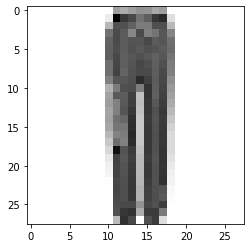

In [8]:
import matplotlib.pyplot as plt
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Analizamos cómo están distribuidos los datos.

A la hora de dividirlos en aquellos que usaremos para entrenar la red neuronal y los que usaremos como prueba, idealmente querríamos una buena distribución de las imágenes de forma que haya un porcentaje similar de cada tipo de prenda, para ambos lotes. 

Si no estuviesen distribuidas de forma aceptable, no podríamos separar los datos de forma aleatoria.

In [9]:
cont=0
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
for i in train_labels:
  if i==0:
    cont=cont+1
  elif i==1:
    cont1=cont1+1
  elif i==2:
    cont2=cont2+1
  elif i==3:
    cont3=cont3+1
  elif i==4:
    cont4=cont4+1
  elif i==5:
    cont5=cont5+1
  elif i==6:
    cont6=cont6+1
  elif i==7:
    cont7=cont7+1
  elif i==8:
    cont8=cont8+1
  elif i==9:
    cont9=cont9+1
print(cont,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9)

6000 6000 6000 6000 6000 6000 6000 6000 6000 6000


Tenemos 6.000 imágenes de cada tipo de ropa, en los datos de entrenamiento, un 10% de cada etiqueta, por lo que podemos decir que están bien distribuidos y podemos proceder.

# Preparación de datos


Normalizamos las imágenes, y las representamos, para verificar que se ha realizado correctamente. 

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.33 0.38 0.43 0.42 0.34 0.38 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 1.   0.78 0.72 0.56 0.63 0.78 0.84 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.28 0.68 0.68 0.62 0.51 0.52 0.69 0.69 0.27 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.71 0.64 0.47 0.71 0.49 0.55 0.66 0.48 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.71 0.64 0.67 0.67 0.72 0.64 0.66 0.56 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.62 0.69 0.64 0.68 0.65 0.68 0.67 0.64 0.58 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.71 0.63 0.66 0.69 0.65 0.62 0.66 0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.
 

Gracias al término one hot enconding, cambiamos el formato de las etiquetas. Lo que encontramos ahora es un vector de 10 bits, con todos los valores en 0, excepto un bit cuyo valor sea 1 cuya posición nos indicará a qué clase de ropa pertenece la imagen. 


In [11]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Casos

## Caso 1

Procedemos 

In [13]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Procedemos a observar un diagrama que represente las capas con las que se está trabajando. En este caso, en la primera capa le entra un vector de tamaño 784 

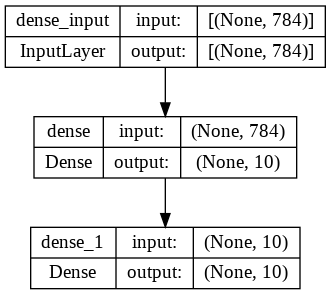

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [15]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [25]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5803 - accuracy: 0.8072
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5617 - accuracy: 0.8140
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5458 - accuracy: 0.8181
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5333 - accuracy: 0.8219
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.8249


In [26]:
test_loss, test_acc = network.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.8100
test_loss: 0.555476725101471
test_acc: 0.8100000023841858


## Caso 2

In [29]:
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


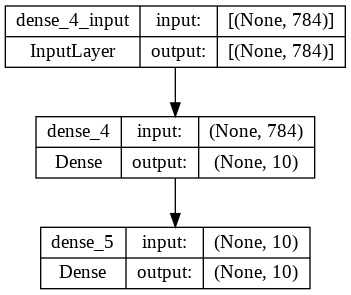

In [30]:
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [31]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
network2.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7844 - accuracy: 0.7448
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.8230
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4801 - accuracy: 0.8355
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.8414
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.8455


In [33]:
test_loss, test_acc = network2.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.8334
test_loss: 0.4815976023674011
test_acc: 0.8334000110626221


## Caso 2.2

In [36]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))
network22.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


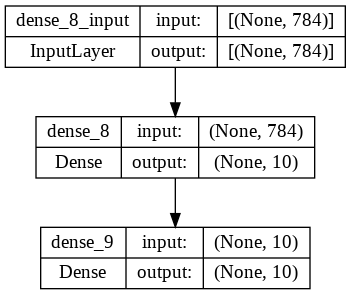

In [37]:
keras.utils.plot_model(network22, "my_first_model.png", show_shapes=True)

In [38]:
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [39]:
network22.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8328 - accuracy: 0.7352
Epoch 2/25
469/469 [==============================] - 2s 3ms/step - loss: 0.5123 - accuracy: 0.8276
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.8386
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8448
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.8504
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.8528
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8538
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8566
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8588
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8594

In [40]:
test_loss, test_acc = network22.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8504
test_loss: 0.434901624917984
test_acc: 0.8503999710083008


## Caso 3

In [41]:
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


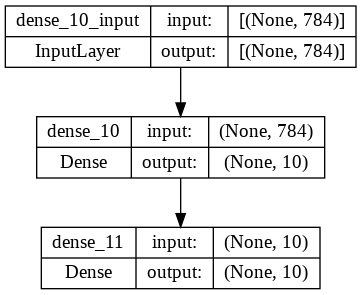

In [42]:
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [43]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [44]:
network3.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0954 - accuracy: 0.3349
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.8153 - accuracy: 0.5042
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.6195 - accuracy: 0.5640
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.4659 - accuracy: 0.6061
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3431 - accuracy: 0.6560


In [45]:
test_loss, test_acc = network3.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.2987 - accuracy: 0.6639
test_loss: 1.2987070083618164
test_acc: 0.6639000177383423


##Caso 3.2 

**Keras flatten** aplana la entrada sin afectar el tamaño del lote. Se utiliza cuando se trata de cualquiera de los tensores multidimensionales que consisten en conjuntos de datos de imágenes y conjuntos de datos de múltiples capas que no permiten perder ninguna información de los mismos.

El método layer.flatten() se utiliza para convertir una matriz multidimensional en una matriz plana unidimensional o, por ejemplo, una matriz unidimensional.

Ninguna de las dimensiones del lote se incluye como parte de keras.layer.flatten, donde la noción simple es la alimentación de la entrada como multidimensional y la salida esperada como una matriz unidimensional.

Observamos como implementarla en el caso 3: 

In [47]:
network32= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 
network32.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


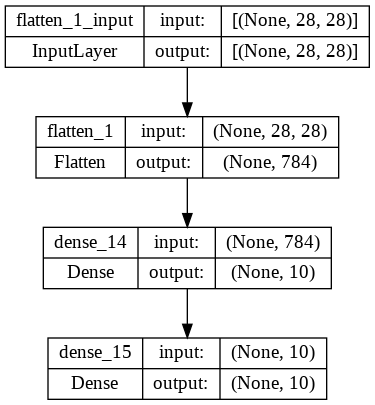

In [48]:
keras.utils.plot_model(network32, "my_first_model.png", show_shapes=True)

In [49]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [50]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
network32.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.6780 - accuracy: 0.1383
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1500 - accuracy: 0.1631
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 1.9320 - accuracy: 0.2142
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7908 - accuracy: 0.2149
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7241 - accuracy: 0.2413


In [52]:
test_loss, test_acc = network32.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.6906 - accuracy: 0.2886
test_loss: 1.6905590295791626
test_acc: 0.28859999775886536


## Caso 4

In [53]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

DSDSAFASDFAS

In [54]:
# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)

In [55]:
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


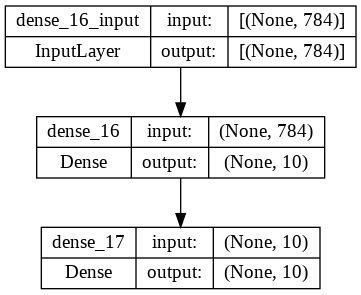

In [56]:
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [57]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [58]:
network4.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4972 - accuracy: 0.6212
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.9089 - accuracy: 0.7600
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6662 - accuracy: 0.8105
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5527 - accuracy: 0.8305
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4954 - accuracy: 0.8395


In [59]:
test_loss, test_acc = network4.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.8336
test_loss: 0.5091662406921387
test_acc: 0.8335999846458435


## Caso 5

In [60]:
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


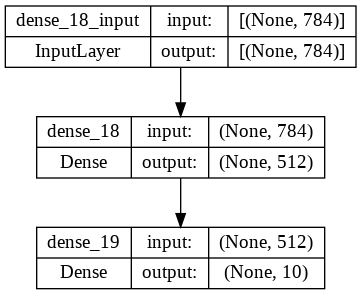

In [61]:
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [62]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [63]:
network5.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.9938 - accuracy: 0.6996
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6539 - accuracy: 0.7914
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5778 - accuracy: 0.8132
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5385 - accuracy: 0.8226
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5121 - accuracy: 0.8298


In [64]:
test_loss, test_acc = network5.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5323 - accuracy: 0.8192
test_loss: 0.5322776436805725
test_acc: 0.8191999793052673


## Caso 6

In [65]:
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


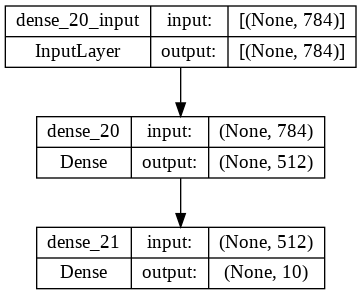

In [66]:
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [67]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [68]:
network6.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5645 - accuracy: 0.7999
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3828 - accuracy: 0.8599
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3360 - accuracy: 0.8763
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3110 - accuracy: 0.8859
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2929 - accuracy: 0.8931


In [69]:
test_loss, test_acc = network6.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8720
test_loss: 0.3656490445137024
test_acc: 0.871999979019165


## Caso 7

In [70]:
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


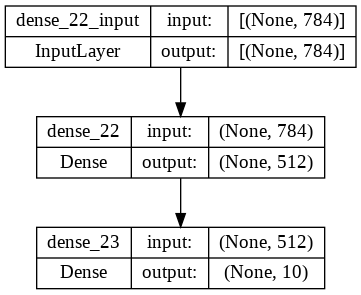

In [71]:
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [72]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [73]:
network7.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 1.6836 - accuracy: 0.5925
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1240 - accuracy: 0.7104
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.9233 - accuracy: 0.7295
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.8232 - accuracy: 0.7419
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.7627 - accuracy: 0.7504


In [74]:
test_loss, test_acc = network7.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.7478
test_loss: 0.7522121071815491
test_acc: 0.7477999925613403


##Caso 7.2

In [75]:
network72 = models.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))
network72.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


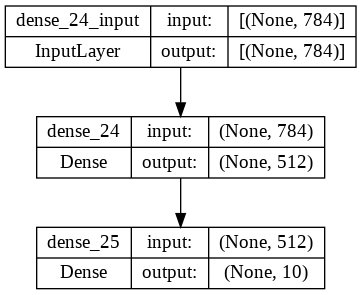

In [76]:
keras.utils.plot_model(network72, "my_first_model.png", show_shapes=True)

In [77]:
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [78]:
network72.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 1.7278 - accuracy: 0.5701
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 1.1365 - accuracy: 0.7084
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.9279 - accuracy: 0.7297
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.8249 - accuracy: 0.7419
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7627 - accuracy: 0.7516
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7205 - accuracy: 0.7598
Epoch 7/25
469/469 [==============================] - 6s 14ms/step - loss: 0.6895 - accuracy: 0.7656
Epoch 8/25
469/469 [==============================] - 5s 10ms/step - loss: 0.6650 - accuracy: 0.7723
Epoch 9/25
469/469 [==============================] - 5s 11ms/step - loss: 0.6451 - accuracy: 0.7774
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6282 - accuracy: 0.7

In [79]:
test_loss, test_acc = network72.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5343 - accuracy: 0.8122
test_loss: 0.534339427947998
test_acc: 0.8122000098228455


## Caso 8

In [80]:
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               401920    
                                                                 
 dense_27 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


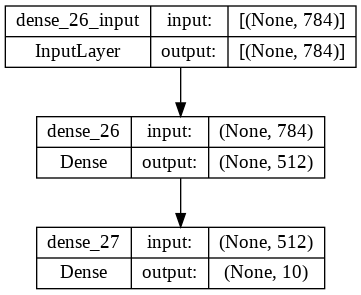

In [81]:
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [82]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [83]:
network8.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5913 - accuracy: 0.7928
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.4272 - accuracy: 0.8450
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3859 - accuracy: 0.8590
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3591 - accuracy: 0.8697
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3386 - accuracy: 0.8754


In [84]:
test_loss, test_acc = network8.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8547
test_loss: 0.3969250023365021
test_acc: 0.8547000288963318


##Comparación predicción resultados imagen test 6

In [85]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 2s 6ms/step


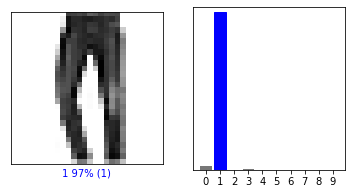

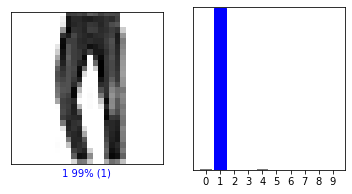

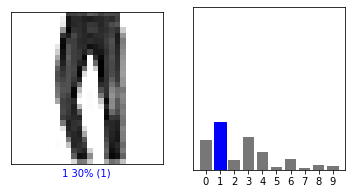

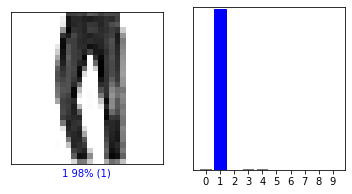

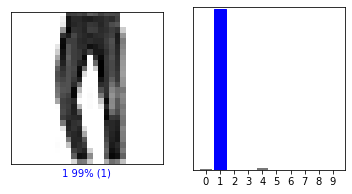

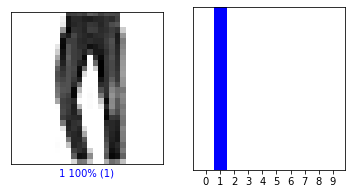

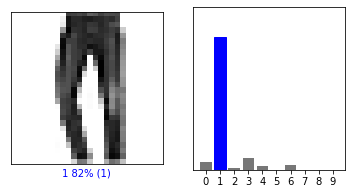

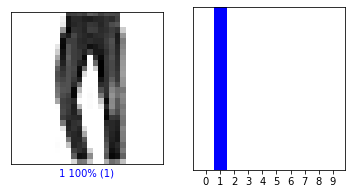

In [87]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()

In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================


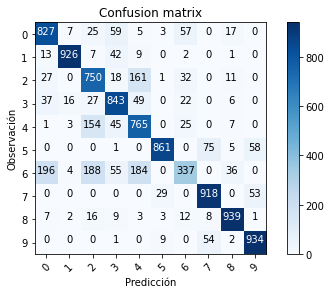

In [100]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================


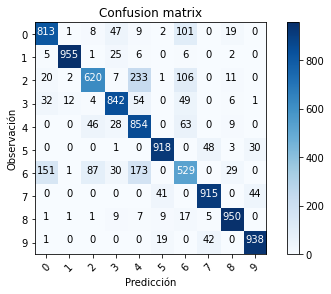

In [93]:
Y_pred_classes2 = np.argmax(predictions2, axis = 1) 
Y_true2 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================")
plot_confusion_matrix(confusion_mtx2, classes = range(10)) 

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================


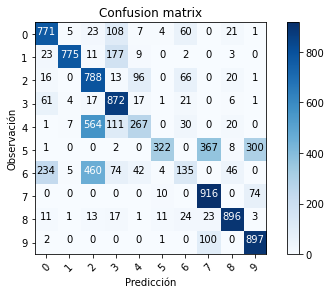

In [94]:
Y_pred_classes3 = np.argmax(predictions3, axis = 1) 
Y_true3 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================")
plot_confusion_matrix(confusion_mtx3, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================


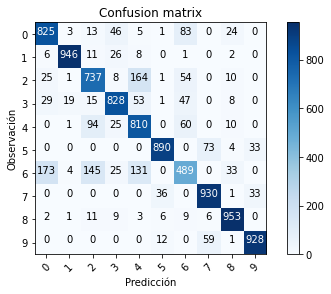

In [95]:
Y_pred_classes4 = np.argmax(predictions4, axis = 1) 
Y_true4 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================")
plot_confusion_matrix(confusion_mtx4, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================


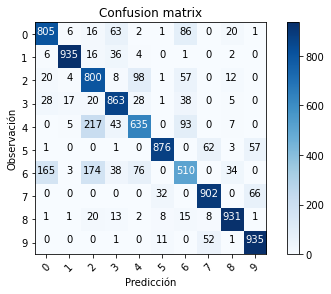

In [96]:
Y_pred_classes5 = np.argmax(predictions5, axis = 1) 
Y_true5 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx5 = confusion_matrix(Y_true5, Y_pred_classes5) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================")
plot_confusion_matrix(confusion_mtx5, classes = range(10)) 

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================


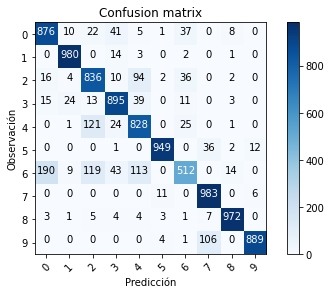

In [97]:
Y_pred_classes6 = np.argmax(predictions6, axis = 1) 
Y_true6 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx6 = confusion_matrix(Y_true6, Y_pred_classes6) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================")
plot_confusion_matrix(confusion_mtx6, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================


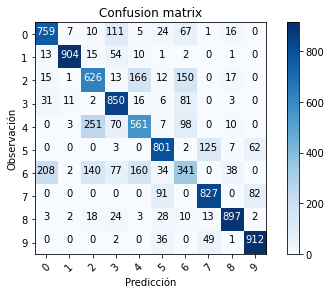

In [98]:
Y_pred_classes7 = np.argmax(predictions7, axis = 1) 
Y_true7 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx7 = confusion_matrix(Y_true7, Y_pred_classes7) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================")
plot_confusion_matrix(confusion_mtx7, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================


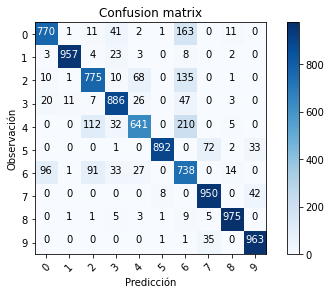

In [99]:
Y_pred_classes8 = np.argmax(predictions8, axis = 1) 
Y_true8 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx8 = confusion_matrix(Y_true8, Y_pred_classes8) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================")
plot_confusion_matrix(confusion_mtx8, classes = range(10))